In [1631]:
Training_columns=['Freq_Of_Word_33', 'Freq_Of_Word_50', 'Freq_Of_Word_36',
       'Freq_Of_Word_29', 'Freq_Of_Word_46', 'Freq_Of_Word_45',
       'Freq_Of_Word_27', 'Freq_Of_Word_37', 'Freq_Of_Word_3',
       'Freq_Of_Word_18', 'Freq_Of_Word_17', 'Freq_Of_Word_5',
       'StylizedLetters', 'Freq_Of_Word_2', 'Freq_Of_Word_6', 'Freq_Of_Word_8',
       'Freq_Of_Word_19', 'Freq_Of_Word_25', 'Freq_Of_Word_20',
       'LengthOFFirstParagraph', 'Freq_Of_Word_11', 'Freq_Of_Word_16',
       'Freq_Of_Word_24', 'Freq_Of_Word_23', 'Freq_Of_Word_7',
       'Freq_Of_Word_21','IsGoodNews']
Testing=['Freq_Of_Word_33', 'Freq_Of_Word_50', 'Freq_Of_Word_36',
       'Freq_Of_Word_29', 'Freq_Of_Word_46', 'Freq_Of_Word_45',
       'Freq_Of_Word_27', 'Freq_Of_Word_37', 'Freq_Of_Word_3',
       'Freq_Of_Word_18', 'Freq_Of_Word_17', 'Freq_Of_Word_5',
       'StylizedLetters', 'Freq_Of_Word_2', 'Freq_Of_Word_6', 'Freq_Of_Word_8',
       'Freq_Of_Word_19', 'Freq_Of_Word_25', 'Freq_Of_Word_20',
       'LengthOFFirstParagraph', 'Freq_Of_Word_11', 'Freq_Of_Word_16',
       'Freq_Of_Word_24', 'Freq_Of_Word_23', 'Freq_Of_Word_7',
       'Freq_Of_Word_21']

In [1632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.metrics import f1_score, make_scorer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt

import lightgbm as lgb
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [1633]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [1634]:
# df_train=df_train[Training_columns]
# df_test=df_test[Testing]

In [1643]:
combined=pd.concat([df_train,df_test])

In [1644]:
unused=['Freq_Of_Word_1',
 'Freq_Of_Word_4',
 'Freq_Of_Word_15',
 'Freq_Of_Word_26',
 'Freq_Of_Word_30',
 'Freq_Of_Word_31',
 'Freq_Of_Word_35',
 'Freq_Of_Word_38',
 'Freq_Of_Word_39',
 'Freq_Of_Word_41',
 'Freq_Of_Word_43',
 'Freq_Of_Word_44',
 'Freq_Of_Word_47',
 'Freq_Of_Word_48',
 'Freq_Of_Word_32', 'Freq_Of_Word_40', 'Freq_Of_Word_34']

In [1645]:
combined.drop(unused,axis=1,inplace=True)

KeyError: "['Freq_Of_Word_1' 'Freq_Of_Word_4' 'Freq_Of_Word_15' 'Freq_Of_Word_26'\n 'Freq_Of_Word_30' 'Freq_Of_Word_31' 'Freq_Of_Word_35' 'Freq_Of_Word_38'\n 'Freq_Of_Word_39' 'Freq_Of_Word_41' 'Freq_Of_Word_43' 'Freq_Of_Word_44'\n 'Freq_Of_Word_47' 'Freq_Of_Word_48' 'Freq_Of_Word_32' 'Freq_Of_Word_40'\n 'Freq_Of_Word_34'] not found in axis"

In [1638]:
df_train=combined.iloc[:947,]
df_test=combined.iloc[947:,]

In [1639]:
Y=df_train.iloc[:,-1]

In [1640]:
X=np.sqrt(df_train.iloc[:,:-1]+2)

In [1641]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [1642]:

X_train, X_test, Y_train, Y_test = train_test_split(df_train.drop(labels=['IsGoodNews'], axis=1),df_train['IsGoodNews'],test_size=0.3,random_state=0)

In [1620]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


In [1621]:
# params={'colsample_bytree': 1.0,
#   'gamma': 2,
#   'max_depth': 6,
#   'min_child_weight': 1,
#   'n_estimators': 200,
#   'subsample': 0.6}

In [1622]:
rf = XGBClassifier()
rf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [1623]:
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))


F1 score 0.9107142857142857
Accuracy Score = 92.98


In [1504]:
X_train=X_train.drop(zero,axis=1)
X_test=X_test.drop(zero,axis=1)

In [1501]:
zero=[]
for feat, importance in zip(X_train.columns, rf.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    if(importance>0.007):
        zero.append(feat)

feature: Freq_Of_Word_2, importance: 0.009026425890624523
feature: Freq_Of_Word_3, importance: 0.00523829460144043
feature: Freq_Of_Word_5, importance: 0.012201576493680477
feature: Freq_Of_Word_6, importance: 0.0021538562141358852
feature: Freq_Of_Word_7, importance: 0.1265682578086853
feature: Freq_Of_Word_8, importance: 0.05335995554924011
feature: Freq_Of_Word_9, importance: 0.0033796695061028004
feature: Freq_Of_Word_10, importance: 0.013258102349936962
feature: Freq_Of_Word_11, importance: 0.021975239738821983
feature: Freq_Of_Word_12, importance: 0.00896446406841278
feature: Freq_Of_Word_13, importance: 0.03835540637373924
feature: Freq_Of_Word_14, importance: 0.0003693341859616339
feature: Freq_Of_Word_16, importance: 0.024287249892950058
feature: Freq_Of_Word_17, importance: 0.01606958732008934
feature: Freq_Of_Word_18, importance: 0.006735493894666433
feature: Freq_Of_Word_19, importance: 0.006926134694367647
feature: Freq_Of_Word_20, importance: 0.052473533898591995
feature:

In [1476]:
# ##Submission
# df_train=combined.iloc[:947,]
# df_test=combined.iloc[947:,]

# Y_train = df_train['IsGoodNews']
# X_train = df_train.drop('IsGoodNews', axis=1)

# rf = XGBClassifier()
# rf.fit(X_train,Y_train)

# pred = rf.predict(df_test.drop(["IsGoodNews"],axis=1))

# submission=pd.DataFrame(pred,columns=["IsGoodNews"])


# submission=pd.DataFrame(pred,columns=["IsGoodNews"])
# submission.IsGoodNews=submission.IsGoodNews.astype(int)
# submission.to_excel("submission.xlsx")



In [1477]:
from xgboost import plot_importance

plt.figure(figsize=(20,10))
#plot_importance(rf, max_num_features=30)

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [1478]:
rf.get_booster().get_score(importance_type="gain")

{'Freq_Of_Word_7': 11.723599699096152,
 'Freq_Of_Word_24': 17.92863190225,
 'Freq_Of_Word_16': 2.249647695293549,
 'TotalEmojiCharacters': 1.3344314088688887,
 'Freq_Of_Word_8': 4.9425564479999995,
 'Freq_Of_Word_13': 3.55273438,
 'Freq_Of_Word_19': 0.6415449236194302,
 'StylizedLetters': 0.4907867659535133,
 'Freq_Of_Word_21': 3.592898462190817,
 'Freq_Of_Word_12': 0.8303486575166666,
 'Freq_Of_Word_46': 3.375427938513043,
 'Freq_Of_Word_5': 1.1301917220380953,
 'LengthOFFirstParagraph': 1.2031292324041665,
 'Freq_Of_Word_18': 0.623886516452941,
 'Freq_Of_Word_37': 1.2761672270875,
 'Freq_Of_Word_10': 1.2280542199624997,
 'Freq_Of_Word_33': 1.0254650793333333,
 'Freq_Of_Word_23': 4.748156783714285,
 'Freq_Of_Word_20': 4.860449856666667,
 'Freq_Of_Word_25': 9.138237924294115,
 'Freq_Of_Word_27': 5.457356082529412,
 'Freq_Of_Word_45': 0.6858584201575758,
 'Freq_Of_Word_49': 0.7073883956666666,
 'Freq_Of_Word_11': 2.035493776655555,
 'Freq_Of_Word_17': 1.4884726430125,
 'Freq_Of_Word_14'

In [1479]:
#rf.feature_importances_

In [1275]:
zero=[]
for feat, importance in zip(X_train.columns, rf.feature_importances_):
    #print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    if(importance==0.0):
        zero.append(feat)
X_train=X_train.drop(zero,axis=1)
X_test=X_test.drop(zero,axis=1)

In [1276]:
X_test.shape

(285, 36)

In [1277]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC

In [1372]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3)
xgb=XGBClassifier()
gaussian = GaussianNB()
linear_svc = LinearSVC()
decision_tree = DecisionTreeClassifier()
#perceptron = Perceptron(max_iter=5)
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()


models = [logreg,knn,gaussian, linear_svc,rf, gboost,xgb,decision_tree ]
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    #score = compute_score(clf=model, X=X_train, y=Y_train, scoring='accuracy')
    model.fit(X_train,Y_train)
    score=round(model.score(X_test, Y_test) * 100, 2)
    predictions = model.predict(X_test)
    accuracy = f1_score(Y_test, predictions)
    print ('CV score = {0}'.format(score))
    print ('F1 Score score = {0}'.format(accuracy))



Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 90.88
F1 Score score = 0.8807339449541284
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 88.42
F1 Score score = 0.8450704225352113
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 85.26
F1 Score score = 0.8359375000000001
Cross-validation of : <class 'sklearn.svm._classes.LinearSVC'>
CV score = 91.23
F1 Score score = 0.8868778280542986
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 92.98
F1 Score score = 0.9090909090909092
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 93.33
F1 Score score = 0.9155555555555556
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 92.98
F1 Score score = 0.9107142857142857
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 85.96
F1 Score score = 0

In [1427]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1428]:
predictions = gboost.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(gboost.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))

F1 score 0.9155555555555556
Accuracy Score = 93.33


In [1425]:
sort(rf.feature_importances_)

array([0.00036933, 0.00215386, 0.00267368, 0.00333807, 0.00337967,
       0.00523829, 0.00529855, 0.00673549, 0.00692613, 0.00740454,
       0.00760775, 0.00763698, 0.00896446, 0.00902643, 0.00993743,
       0.01086708, 0.01107095, 0.01220158, 0.01298901, 0.0132581 ,
       0.01377753, 0.01402544, 0.01440655, 0.01606959, 0.02197524,
       0.02428725, 0.0364412 , 0.03835541, 0.03878902, 0.05126121,
       0.05247353, 0.05335996, 0.05891775, 0.09865663, 0.12656826,
       0.19355795], dtype=float32)

In [1430]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
thresholds = sort(gboost.feature_importances_)
#thresholds=0.0001
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(gboost, threshold=thresh, prefit=True)
    #print(selection)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model =XGBClassifier()
    selection_model.fit(select_X_train, Y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = f1_score(Y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
    print(round(selection_model.score(select_X_test, Y_test) * 100, 2))


Thresh=0.000, n=36, Accuracy: 91.07%
92.98
Thresh=0.000, n=35, Accuracy: 90.58%
92.63
Thresh=0.001, n=34, Accuracy: 89.69%
91.93
Thresh=0.002, n=33, Accuracy: 90.58%
92.63
Thresh=0.002, n=32, Accuracy: 89.69%
91.93
Thresh=0.002, n=31, Accuracy: 89.29%
91.58
Thresh=0.003, n=30, Accuracy: 90.58%
92.63
Thresh=0.003, n=29, Accuracy: 90.58%
92.63
Thresh=0.003, n=28, Accuracy: 89.78%
91.93
Thresh=0.003, n=27, Accuracy: 90.18%
92.28
Thresh=0.003, n=26, Accuracy: 89.78%
91.93
Thresh=0.003, n=25, Accuracy: 90.58%
92.63
Thresh=0.003, n=24, Accuracy: 91.07%
92.98
Thresh=0.004, n=23, Accuracy: 90.58%
92.63
Thresh=0.004, n=22, Accuracy: 88.79%
91.23
Thresh=0.004, n=21, Accuracy: 88.39%
90.88
Thresh=0.005, n=20, Accuracy: 90.27%
92.28
Thresh=0.005, n=19, Accuracy: 89.87%
91.93
Thresh=0.006, n=18, Accuracy: 90.18%
92.28
Thresh=0.007, n=17, Accuracy: 89.19%
91.58
Thresh=0.009, n=16, Accuracy: 89.69%
91.93
Thresh=0.010, n=15, Accuracy: 89.69%
91.93
Thresh=0.010, n=14, Accuracy: 90.50%
92.63
Thresh=0.01

In [1388]:
selection = SelectFromModel(rf, threshold=0.011,prefit=True)
select_X_train = selection.transform(X_train)
selection_model = XGBClassifier()
select_X_test = selection.transform(X_test)
selection_model.fit(select_X_train, Y_train)
predictions = selection_model.predict(select_X_test)


print(f1_score(Y_test, predictions))

print(round(selection_model.score(select_X_test, Y_test) * 100, 2))


0.9181818181818182
93.68


In [1393]:
selection_model.get_booster().get_score(importance_type="gain")

{'f4': 10.222218174784375,
 'f16': 18.573691408875,
 'f9': 2.487695826896666,
 'f23': 1.3252714983518528,
 'f5': 5.074714666666666,
 'f14': 3.3906279474280705,
 'f12': 0.6362194196542186,
 'f25': 0.5775644683737933,
 'f8': 0.672654474566842,
 'f21': 3.4462683501181828,
 'f2': 0.9582119617190473,
 'f24': 0.8131934163067301,
 'f11': 0.8034660356588235,
 'f19': 1.1136618061444445,
 'f6': 0.6100751391444444,
 'f15': 5.023194334428569,
 'f13': 3.797238353125,
 'f17': 7.914196375823531,
 'f18': 5.831433379941178,
 'f20': 0.9512116545250002,
 'f22': 0.3516628102316456,
 'f1': 0.5518536402727272,
 'f7': 1.0138162530000001,
 'f0': 0.9561603277142857,
 'f10': 2.0680133884,
 'f3': 0.2136137507}

In [1133]:
from sklearn import metrics
print('XGBClassifier: ')
print(metrics.classification_report(Y_test, rf.predict(X_test)))

#print(metrics.confusion_matrix(expected_y, predicted_y))


XGBClassifier: 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       174
         1.0       0.93      0.90      0.91       111

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285



## Hyperparameter Optimization

In [947]:
# Y_train = df_train['IsGoodNews']
# X_train = df_train.drop('IsGoodNews', axis=1)

In [ ]:
# 'max_depth': [2,3,4,5,6],
#                        'n_estimators': [i for i in range(100,600,50)], 
#                        'gamma': [i/10.0 for i in range(3,6)],
#                        'subsample':[i/10.0 for i in range(6,10)],
#                        'colsample_bytree':[i/10.0 for i in range(6,11)], 
#                        'max_depth': [2,3,4,5,6],
#                        'learning_rate' : [0.03,0.08,0,1,0.3,0.5]

In [957]:
# params = {
#         'n_estimators' : [800],
#         'min_child_weight': [1, 2, 13],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [6,7,8,12]
#         }

In [958]:
# rf = XGBClassifier(nthread=-1) 
# clf = GridSearchCV(rf,params,
#                     cv=3,
#                     verbose=1, 
#                     scoring='f1',
#                       n_jobs=4,)

# clf.fit(X_train,Y_train)
# clf.best_score_, clf.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 972 out of 972 | elapsed:  3.7min finished


(0.9078023638140941,
 {'colsample_bytree': 0.8,
  'gamma': 1.5,
  'max_depth': 7,
  'min_child_weight': 1,
  'n_estimators': 800,
  'subsample': 0.6})

## Feature selection with Recursive Feature Elimination

In [948]:
par={'colsample_bytree': 1.0,
  'gamma': 2,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 200,
  'subsample': 0.6}

In [979]:
rf = XGBClassifier(n_estimators=800)
rf.fit(X_train,Y_train)
#rf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [950]:
pred = rf.predict(df_test)
submission=pd.DataFrame(pred,columns=["IsGoodNews"])

In [951]:
submission.IsGoodNews=submission.IsGoodNews.astype(int)
submission.to_excel("submission.xlsx")

## Feature importance

In [1043]:
zero=[]
for feat, importance in zip(X_train.columns, rf.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    if(importance==0.0):
        zero.append(feat)
#print(zero)

feature: Freq_Of_Word_2, importance: 0.006537522189319134
feature: Freq_Of_Word_3, importance: 0.0066892788745462894
feature: Freq_Of_Word_5, importance: 0.009110324084758759
feature: Freq_Of_Word_6, importance: 0.003647834761068225
feature: Freq_Of_Word_7, importance: 0.15155702829360962
feature: Freq_Of_Word_8, importance: 0.025289153680205345
feature: Freq_Of_Word_9, importance: 0.0033671611454337835
feature: Freq_Of_Word_10, importance: 0.010341299697756767
feature: Freq_Of_Word_11, importance: 0.004198987036943436
feature: Freq_Of_Word_12, importance: 0.007514134515076876
feature: Freq_Of_Word_13, importance: 0.010913271456956863
feature: Freq_Of_Word_14, importance: 0.0027278789784759283
feature: Freq_Of_Word_16, importance: 0.0325244665145874
feature: Freq_Of_Word_17, importance: 0.01315219420939684
feature: Freq_Of_Word_18, importance: 0.006506460718810558
feature: Freq_Of_Word_19, importance: 0.006160132121294737
feature: Freq_Of_Word_20, importance: 0.025597285479307175
featu

In [886]:
# from numpy import sort
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import accuracy_score
# thresholds = sort(model.feature_importances_)
# #thresholds=0.0001
# for thresh in thresholds:
# 	# select features using threshold
# 	selection = SelectFromModel(model, threshold=thresh, prefit=True)
# 	select_X_train = selection.transform(X_train)
# 	# train model
# 	selection_model = XGBClassifier(n_estimators=800,max_depth=6)
# 	selection_model.fit(select_X_train, Y_train)
# 	# eval model
# 	select_X_test = selection.transform(X_test)
# 	predictions = selection_model.predict(select_X_test)
# 	accuracy = f1_score(Y_test, predictions)
# 	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

KeyError: 'weight'

In [1024]:
zero

['Freq_Of_Word_1',
 'Freq_Of_Word_4',
 'Freq_Of_Word_15',
 'Freq_Of_Word_26',
 'Freq_Of_Word_30',
 'Freq_Of_Word_31',
 'Freq_Of_Word_35',
 'Freq_Of_Word_38',
 'Freq_Of_Word_39',
 'Freq_Of_Word_41',
 'Freq_Of_Word_43',
 'Freq_Of_Word_44',
 'Freq_Of_Word_47',
 'Freq_Of_Word_48']

## Removing features with zero importance

In [1015]:
X_train.drop(zero,axis=1,inplace=True)
X_test.drop(zero,axis=1,inplace=True)

## Pearson Cofficient

In [811]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train,Y_train,28)
print(str(len(cor_feature)), 'selected features')

28 selected features


In [812]:
final_features=cor_feature

In [813]:
X_train=X_train[final_features]
X_test=X_test[final_features]

In [814]:
X_test.shape

(285, 28)

Feature: 0, Score: 0.21264
Feature: 1, Score: 0.14982
Feature: 2, Score: 0.47828
Feature: 3, Score: 0.32341
Feature: 4, Score: 0.99029
Feature: 5, Score: 0.20221
Feature: 6, Score: 0.37474
Feature: 7, Score: -0.06352
Feature: 8, Score: -0.00950
Feature: 9, Score: -0.38829
Feature: 10, Score: 0.01947
Feature: 11, Score: -0.16252
Feature: 12, Score: 0.40795
Feature: 13, Score: 0.50619
Feature: 14, Score: 0.21775
Feature: 15, Score: -0.07359
Feature: 16, Score: 0.01217
Feature: 17, Score: 1.12457
Feature: 18, Score: 0.66939
Feature: 19, Score: 0.41936
Feature: 20, Score: 1.16286
Feature: 21, Score: 1.58165
Feature: 22, Score: -1.57297
Feature: 23, Score: -1.10277
Feature: 24, Score: -2.29432
Feature: 25, Score: 0.31839
Feature: 26, Score: -0.79296
Feature: 27, Score: -0.38263
Feature: 28, Score: -0.65837
Feature: 29, Score: -0.43205
Feature: 30, Score: -0.99162
Feature: 31, Score: -0.60125
Feature: 32, Score: 0.59423
Feature: 33, Score: -0.10576
Feature: 34, Score: -0.89960
Feature: 35, S

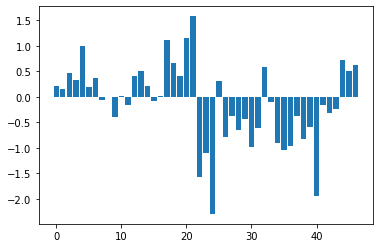

In [129]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Submission

In [566]:
##SUbmission

df_train=combined.iloc[:947,]
df_test=combined.iloc[947:,]

Y_train = df_train['IsGoodNews']
X_train = df_train.drop('IsGoodNews', axis=1)
X_train=X_train[final_features]

In [567]:
df_test=df_test[final_features]

In [568]:
rf = XGBClassifier(n_estimators=800,max_depth=6)
rf.fit(X_train,Y_train)
pred = rf.predict(df_test)
submission=pd.DataFrame(pred,columns=["IsGoodNews"])

In [569]:
rf = XGBClassifier(n_estimators=800,max_depth=6)
rf.fit(X_train,Y_train)
pred = rf.predict(df_test)
submission=pd.DataFrame(pred,columns=["IsGoodNews"])
submission.IsGoodNews=submission.IsGoodNews.astype(int)
submission.to_excel("submission.xlsx")